## **Flower Classification**

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
import os 
import PIL
import pathlib
import tensorflow as tf 
import warnings; warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
os.listdir(data_dir)

['sunflowers', 'roses', 'dandelion', 'daisy', 'tulips', 'LICENSE.txt']

In [5]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [7]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/1666341535_99c6f7509f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5231103167_a03280e9f6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5073473370_bdbb5a99fc.jpg'),
 PosixPath('datasets/flower_photos/roses/7683456068_02644b8382_m.jpg'),
 PosixPath('datasets/flower_photos/roses/16258946661_f9739cdc0a.jpg')]

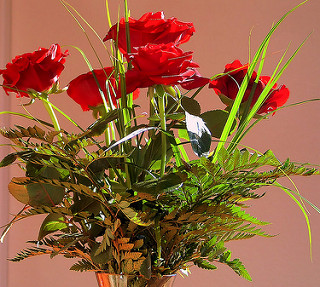

In [8]:
PIL.Image.open(roses[0])

In [9]:
flower_images_dic = {
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'daisy' : list(data_dir.glob('daisy/*.jpg')),
    'dandelion' : list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers' : list(data_dir.glob('sunflowers/*.jpg')),
    'tulips' : list(data_dir.glob('tulips/*.jpg')),
}

In [10]:
flower_labels_dic = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [11]:
img = cv2.imread(str(flower_images_dic['roses'][0]))

In [12]:
X, y = [], []
for flower_name, images in flower_images_dic.items():
  for image in images:
    image = str(image)
    img = cv2.imread(image)
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flower_labels_dic[flower_name])

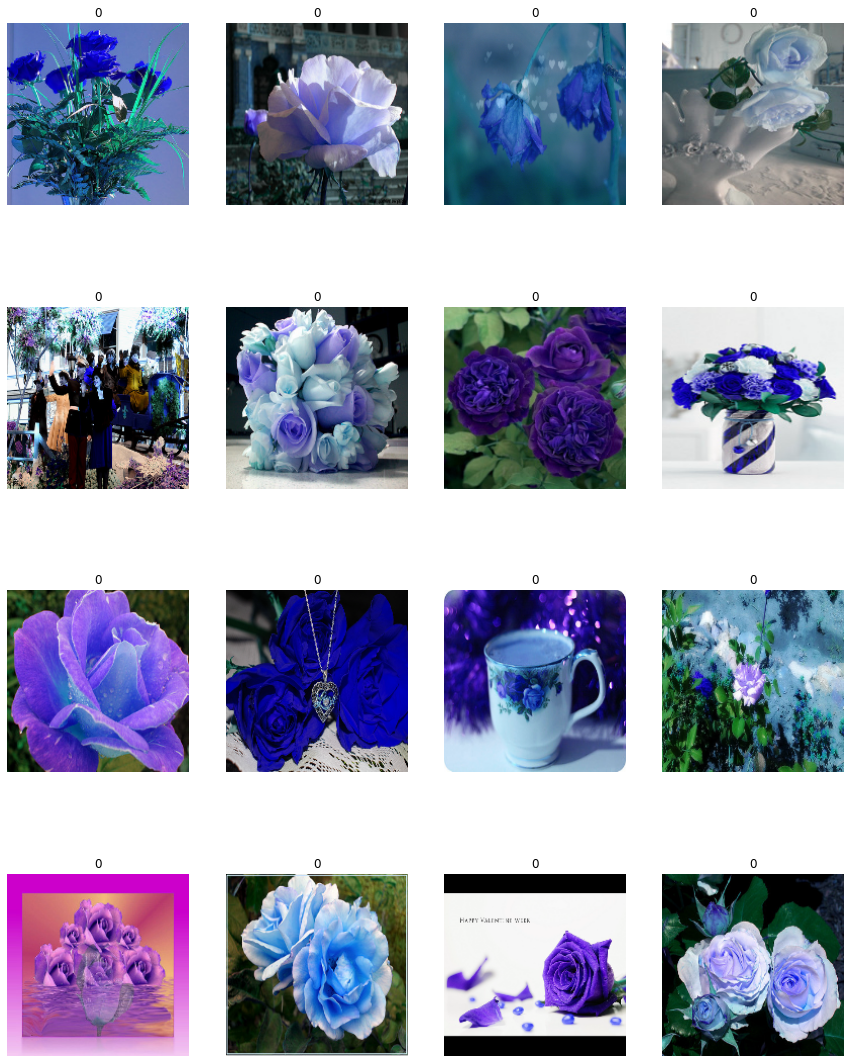

In [13]:
plt.figure(figsize=(15, 20))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.axis('off')
  plt.imshow(X[i])
  plt.title(y[i])
plt.show()

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
print("X_train Length: ", len(X_train))
print("X_test Length: ", len(X_test))

X_train Length:  2752
X_test Length:  918


In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [18]:
model = Sequential([
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
43/43 [==============================] - 14s 77ms/step - loss: 1.5562 - accuracy: 0.3528
Epoch 2/5
43/43 [==============================] - 3s 76ms/step - loss: 1.1281 - accuracy: 0.5498
Epoch 3/5
43/43 [==============================] - 3s 77ms/step - loss: 0.9556 - accuracy: 0.6341
Epoch 4/5
43/43 [==============================] - 3s 76ms/step - loss: 0.8517 - accuracy: 0.6711
Epoch 5/5
43/43 [==============================] - 3s 76ms/step - loss: 0.7091 - accuracy: 0.7355


In [20]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 29ms/step - loss: 0.9962 - accuracy: 0.6264


[0.9962465763092041, 0.6263616681098938]

In [21]:
prediction = model.predict(X_test_scaled)

In [22]:
pred = np.argmax(prediction[1])

In [23]:
pred

4

In [24]:
y_test[1]

0

## **Data Augmentation**

In [25]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip('horizontal'),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1)
])

In [26]:
model = Sequential([
                    data_augmentation,
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, verbose=1)

Epoch 1/20
43/43 [==============================] - 6s 84ms/step - loss: 1.4914 - accuracy: 0.3256
Epoch 2/20
43/43 [==============================] - 4s 85ms/step - loss: 1.1440 - accuracy: 0.5145
Epoch 3/20
43/43 [==============================] - 4s 85ms/step - loss: 1.0232 - accuracy: 0.6007
Epoch 4/20
43/43 [==============================] - 4s 85ms/step - loss: 0.9395 - accuracy: 0.6341
Epoch 5/20
43/43 [==============================] - 4s 84ms/step - loss: 0.8908 - accuracy: 0.6555
Epoch 6/20
43/43 [==============================] - 4s 87ms/step - loss: 0.8493 - accuracy: 0.6755
Epoch 7/20
43/43 [==============================] - 4s 84ms/step - loss: 0.7930 - accuracy: 0.6977
Epoch 8/20
43/43 [==============================] - 4s 84ms/step - loss: 0.7490 - accuracy: 0.7180
Epoch 9/20
43/43 [==============================] - 4s 85ms/step - loss: 0.7240 - accuracy: 0.7206
Epoch 10/20
43/43 [==============================] - 4s 85ms/step - loss: 0.7195 - accuracy: 0.7362
Epoch 11/

In [27]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 21ms/step - loss: 0.9112 - accuracy: 0.6939


[0.9112339019775391, 0.6938998103141785]

In [28]:
prediction = model.predict(X_test_scaled)

In [29]:
pred = []
for p in prediction:
  p = np.argmax(p)
  pred.append(p)

In [30]:
pred = np.array(pred)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.41      0.53       176
           1       0.66      0.74      0.70       154
           2       0.81      0.72      0.76       226
           3       0.68      0.93      0.78       150
           4       0.62      0.70      0.66       212

    accuracy                           0.69       918
   macro avg       0.70      0.70      0.69       918
weighted avg       0.70      0.69      0.69       918

--------------------------------------------------
Accuracy Score:  0.6938997821350763
--------------------------------------------------


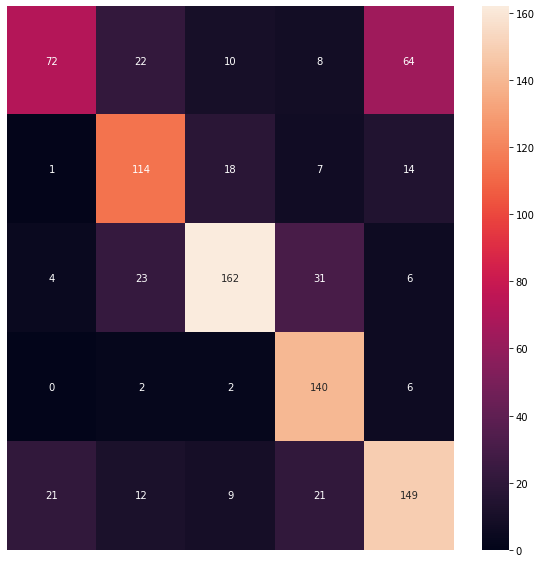

In [32]:
print("Classification Report: \n", classification_report(y_test, pred))
print("-"*50)

print("Accuracy Score: ", accuracy_score(y_test, pred))
print("-"*50)

plt.figure(figsize=(10, 10))
plt.axis('off')
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');